Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/kaggle/input/cnn-dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/kaggle/input/cnn-dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

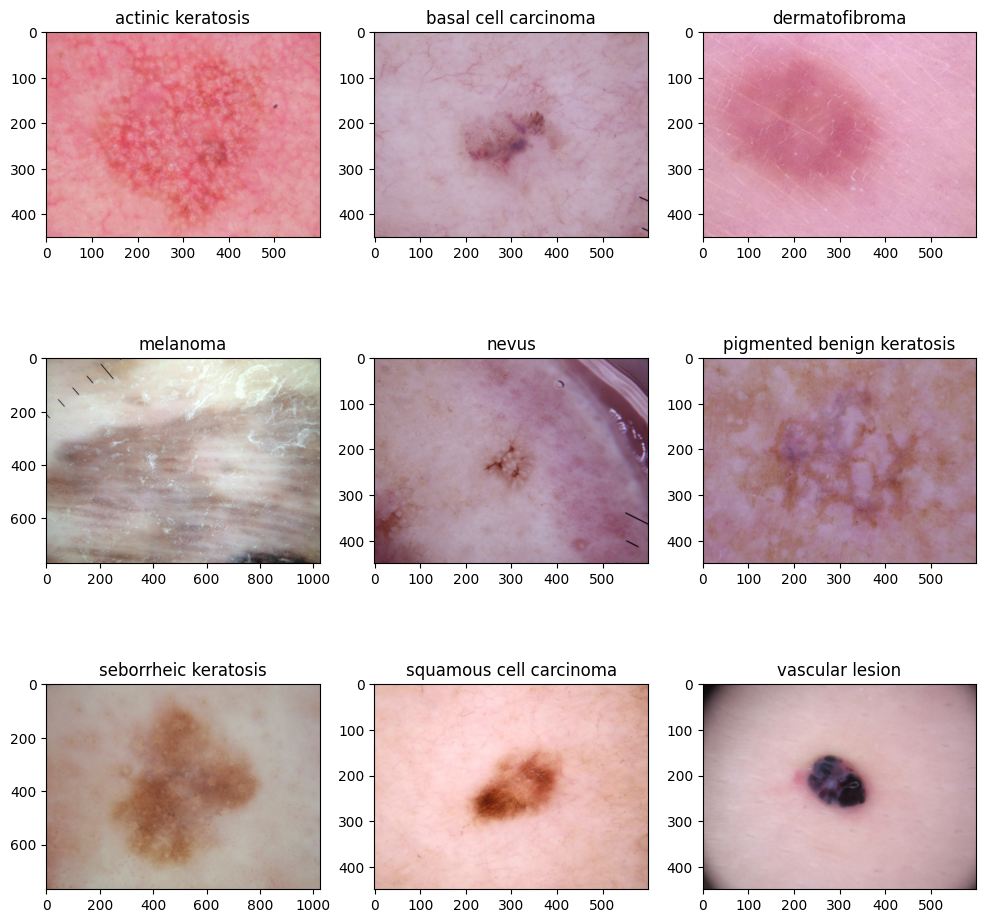

In [8]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-09-13 18:07:25.049892: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


56/56 [==============================] - 38s 172ms/step - loss: 2.0491 - accuracy: 0.1987 - val_loss: 1.9712 - val_accuracy: 0.2617
Epoch 2/20
56/56 [==============================] - 4s 71ms/step - loss: 1.8519 - accuracy: 0.3002 - val_loss: 1.6563 - val_accuracy: 0.4049
Epoch 3/20
56/56 [==============================] - 4s 71ms/step - loss: 1.6669 - accuracy: 0.3912 - val_loss: 1.7390 - val_accuracy: 0.4072
Epoch 4/20
56/56 [==============================] - 4s 70ms/step - loss: 1.6427 - accuracy: 0.4124 - val_loss: 1.6189 - val_accuracy: 0.3870
Epoch 5/20
56/56 [==============================] - 4s 71ms/step - loss: 1.5534 - accuracy: 0.4403 - val_loss: 1.5877 - val_accuracy: 0.4340
Epoch 6/20
56/56 [==============================] - 4s 70ms/step - loss: 1.5500 - accuracy: 0.4570 - val_loss: 1.4392 - val_accuracy: 0.4676
Epoch 7/20
56/56 [==============================] - 4s 73ms/step - loss: 1.3879 - accuracy: 0.5173 - val_loss: 1.5539 - val_accuracy: 0.4430
Epoch 8/20
56/56 [====

### Visualizing training results

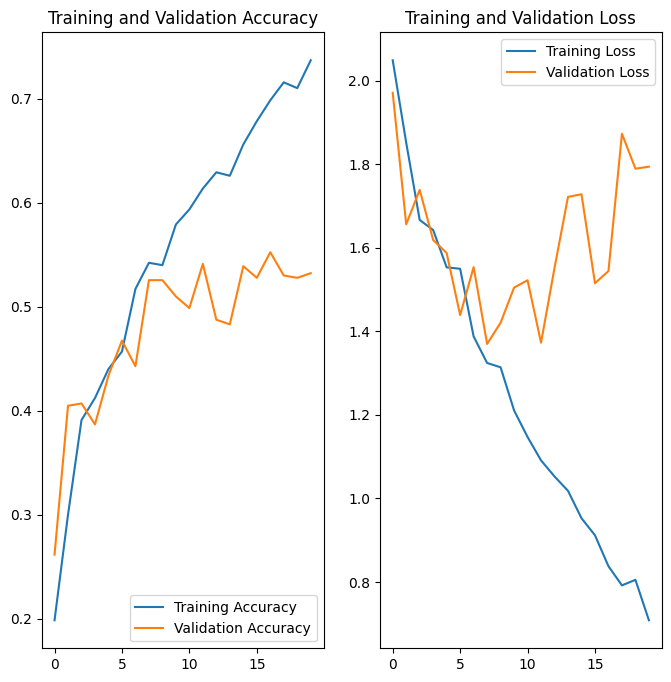

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

1. Training loss consistently decreases, and training accuracy increases, indicating the model learns from training data.

2. Validation metrics fluctuate and do not follow the same trend as training metrics, suggesting potential generalization issues.

3. No strong evidence of severe overfitting, but model performance on validation data could be improved through hyperparameter tuning and regularization.


In [15]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

### Todo:
### Create the model, compile and train the model


In [16]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))




### Compiling the model

In [17]:
### Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [18]:
## Your code goes here, note: train your model for 20 epochs
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


2023-09-13 18:09:28.970018: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


56/56 [==============================] - 8s 89ms/step - loss: 2.0564 - accuracy: 0.1869 - val_loss: 1.9899 - val_accuracy: 0.2125
Epoch 2/30
56/56 [==============================] - 5s 83ms/step - loss: 1.8981 - accuracy: 0.2829 - val_loss: 1.8327 - val_accuracy: 0.3266
Epoch 3/30
56/56 [==============================] - 5s 82ms/step - loss: 1.8550 - accuracy: 0.2969 - val_loss: 1.7884 - val_accuracy: 0.3154
Epoch 4/30
56/56 [==============================] - 5s 82ms/step - loss: 1.7494 - accuracy: 0.3622 - val_loss: 1.6137 - val_accuracy: 0.4228
Epoch 5/30
56/56 [==============================] - 5s 82ms/step - loss: 1.6532 - accuracy: 0.3895 - val_loss: 1.5976 - val_accuracy: 0.4049
Epoch 6/30
56/56 [==============================] - 5s 82ms/step - loss: 1.5621 - accuracy: 0.4526 - val_loss: 1.5416 - val_accuracy: 0.4631
Epoch 7/30
56/56 [==============================] - 5s 83ms/step - loss: 1.5563 - accuracy: 0.4459 - val_loss: 1.5540 - val_accuracy: 0.4385
Epoch 8/30
56/56 [======

### Visualizing the results

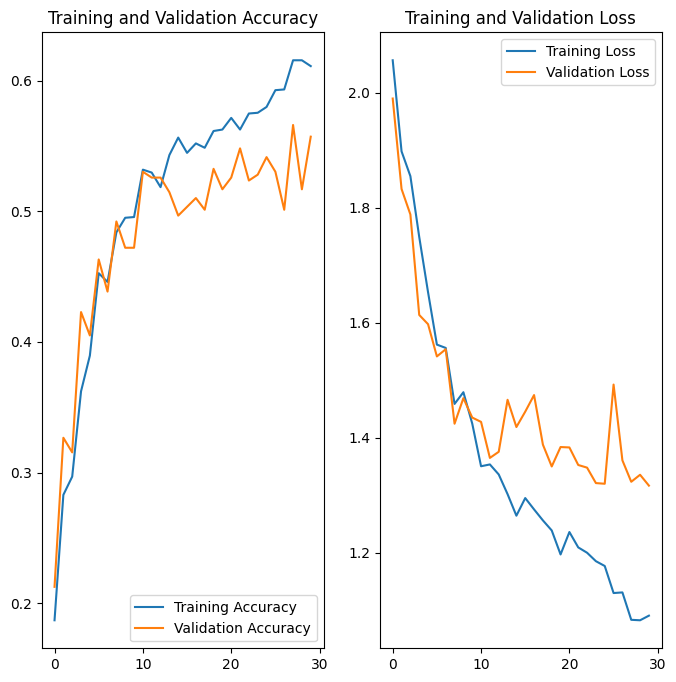

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- In comparison to the previous model run, this updated model shows more consistent improvement in both training and validation metrics.
- The validation accuracy reaches approximately 0.54, which is an improvement over the previous model's highest validation accuracy of around 0.52.
- The validation loss also decreases more consistently in this run.

#### Conclusion:

- There is no strong evidence of severe overfitting, as the training and validation metrics do not significantly diverge. However, the model is still learning and improving, which suggests that it may benefit from further training.

- There is an improvement in model performance compared to the previous model run. The updated model shows more consistent improvement in both training and validation metrics, indicating that it is learning to generalize better to the validation data.

- To further enhance model performance, hyperparameter tuning and potentially more complex model architectures could be explored. Regularization techniques like dropout or weight decay might also help stabilize the fluctuations in validation metrics.

In summary, the updated model is showing signs of improvement and does not exhibit clear overfitting or underfitting, but further optimization may lead to better results.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [20]:
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
1,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
2,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
3,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
4,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
...,...,...
2234,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,vascular lesion
2235,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,vascular lesion
2236,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,vascular lesion
2237,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,vascular lesion


In [21]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
1,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
2,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
3,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
4,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
...,...,...
2234,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,vascular lesion
2235,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,vascular lesion
2236,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,vascular lesion
2237,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,vascular lesion


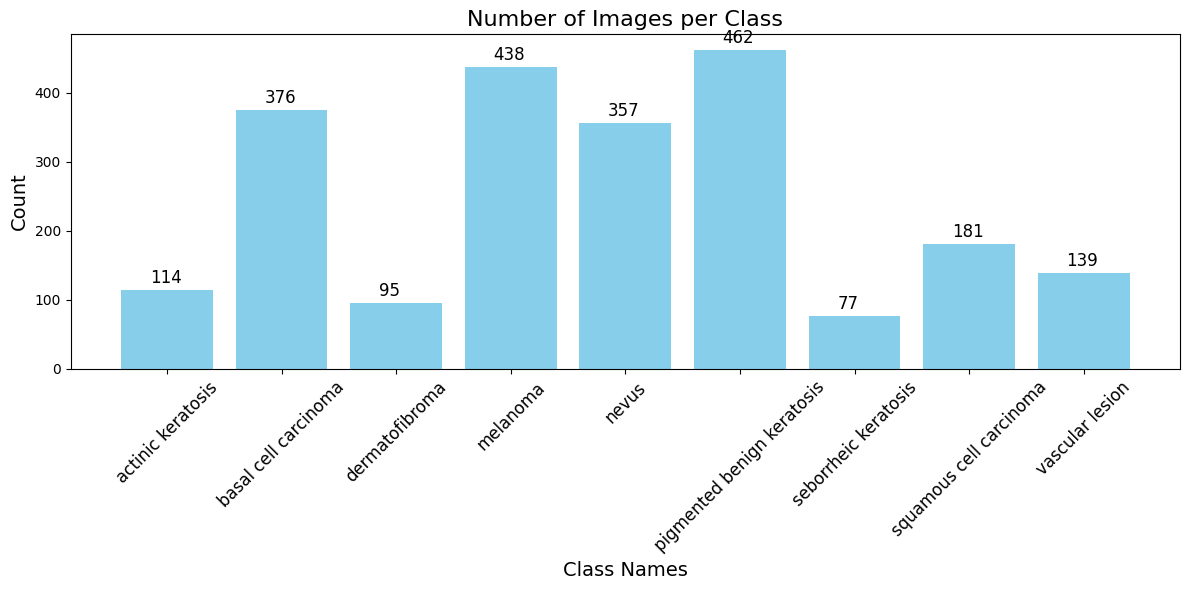

In [22]:
count = [len(list(data_dir_train.glob(f'{class_name}/*.jpg'))) for class_name in class_names]

plt.figure(figsize=(12, 6))
bars = plt.bar(class_names, count, color='skyblue')

for bar, value in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 10, str(value), fontsize=12)

plt.title('Number of Images per Class', fontsize=16)
plt.xlabel('Class Names', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- The class with the smallest sample size is "squamous cell carcinoma.
#### - Which classes dominate the data in terms proportionate number of samples?
- In terms of the proportion of the dataset, "actinic keratosis" and "dermatofibroma" classes have a similar number of samples, while "melanoma" and "pigmented benign keratosis" classes also have a similar proportionate number of samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
import Augmentor

# Define the path to the training dataset directory
path_to_training_dataset = "/kaggle/input/cnn-dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

# Define the list of class names
class_names = [
    "actinic keratosis",
    "basal cell carcinoma",
    "dermatofibroma",
    "melanoma",
    "nevus",
    "pigmented benign keratosis",
    "seborrheic keratosis",
    "squamous cell carcinoma",
    "vascular lesion"
]

# Augment each class separately
for class_name in class_names:
    p = Augmentor.Pipeline(source_directory=path_to_training_dataset + "/" + class_name, output_directory="/kaggle/working/output/" + class_name, save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(100)  # Augment each class with 100 additional samples


Initialised with 114 image(s) found.
Output directory set to /kaggle/working/output/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D43BC337520>: 100%|██████████| 100/100 [00:02<00:00, 42.22 Samples/s]                 


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/output/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D43BC334C10>: 100%|██████████| 100/100 [00:02<00:00, 41.53 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/output/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D43BC596B30>: 100%|██████████| 100/100 [00:03<00:00, 30.13 Samples/s]                 


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/output/melanoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D43BC3A3CD0>: 100%|██████████| 100/100 [00:14<00:00,  6.73 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/output/nevus.

Processing <PIL.Image.Image image mode=RGB size=964x672 at 0x7D43BC363CD0>: 100%|██████████| 100/100 [00:12<00:00,  8.08 Samples/s]                   


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/output/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D43BC4F1E70>: 100%|██████████| 100/100 [00:03<00:00, 29.51 Samples/s]                 


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/output/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D43BC363B80>: 100%|██████████| 100/100 [00:06<00:00, 15.36 Samples/s]                 


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/output/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D43BC4F2230>: 100%|██████████| 100/100 [00:02<00:00, 42.10 Samples/s]                 


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/output/vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D43BC337BB0>: 100%|██████████| 100/100 [00:02<00:00, 40.29 Samples/s]                 


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
data_dir_train1 = pathlib.Path("/kaggle/working/output")
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

900


### Lets see the distribution of augmented data after adding new images to the original training data.

In [26]:
##
for i in class_names:
      
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
1,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
2,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
3,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
4,/kaggle/input/cnn-dataset/Skin cancer ISIC The...,actinic keratosis
...,...,...
3134,/kaggle/working/output/vascular lesion/vascula...,vascular lesion
3135,/kaggle/working/output/vascular lesion/vascula...,vascular lesion
3136,/kaggle/working/output/vascular lesion/vascula...,vascular lesion
3137,/kaggle/working/output/vascular lesion/vascula...,vascular lesion


In [27]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    562
melanoma                      538
basal cell carcinoma          476
nevus                         457
squamous cell carcinoma       281
vascular lesion               239
actinic keratosis             214
dermatofibroma                195
seborrheic keratosis          177
Name: count, dtype: int64

So, now we have added 100 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [28]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [29]:
import pathlib
data_dir_train1=pathlib.Path("/kaggle/input/cnn-dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

In [30]:
data_dir_train1

PosixPath('/kaggle/input/cnn-dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

#### **Todo:** Create a validation dataset

In [31]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


In [32]:
data_dir_train1=pathlib.Path("/kaggle/input/cnn-dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [34]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [36]:
epochs =50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-09-13 18:13:00.657195: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


56/56 [==============================] - 19s 271ms/step - loss: 2.0361 - accuracy: 0.2165 - val_loss: 1.8916 - val_accuracy: 0.3289
Epoch 2/50
56/56 [==============================] - 16s 257ms/step - loss: 1.7952 - accuracy: 0.3488 - val_loss: 1.6203 - val_accuracy: 0.4452
Epoch 3/50
56/56 [==============================] - 17s 271ms/step - loss: 1.6308 - accuracy: 0.4325 - val_loss: 1.6526 - val_accuracy: 0.4049
Epoch 4/50
56/56 [==============================] - 16s 258ms/step - loss: 1.4566 - accuracy: 0.4916 - val_loss: 1.4038 - val_accuracy: 0.5347
Epoch 5/50
56/56 [==============================] - 17s 277ms/step - loss: 1.3627 - accuracy: 0.5335 - val_loss: 1.5087 - val_accuracy: 0.4497
Epoch 6/50
56/56 [==============================] - 16s 260ms/step - loss: 1.2591 - accuracy: 0.5547 - val_loss: 1.5780 - val_accuracy: 0.4855
Epoch 7/50
56/56 [==============================] - 17s 270ms/step - loss: 1.1906 - accuracy: 0.5820 - val_loss: 1.4225 - val_accuracy: 0.5257
Epoch 8/50

#### **Todo:**  Visualize the model results

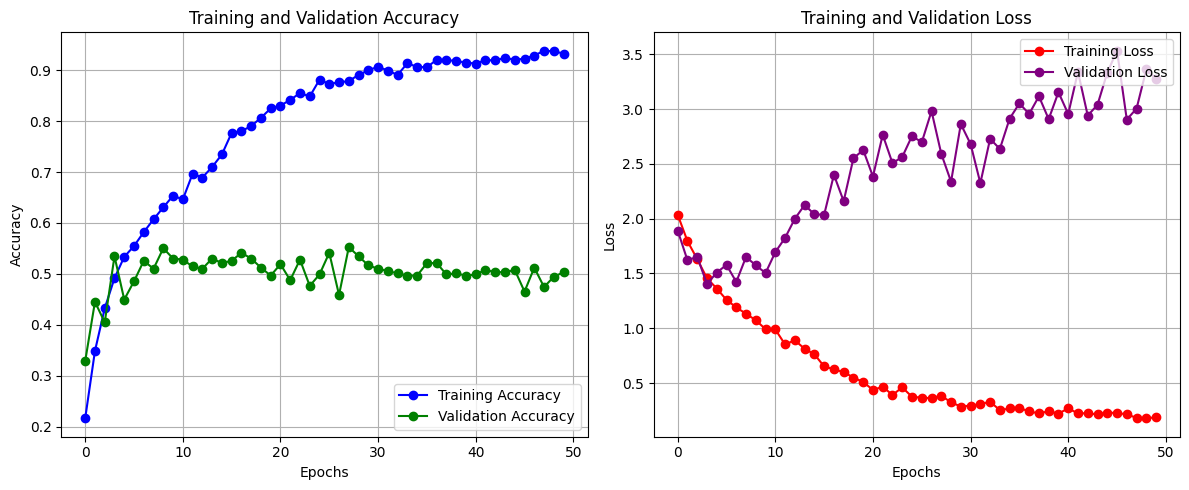

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='green', linestyle='-', marker='o')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='red', linestyle='-', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='purple', linestyle='-', marker='o')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()


#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
- By incorporating the Augmentor library, we observed an improvement in training data accuracy.

- Nevertheless, the model continues to exhibit overfitting.

- Addressing the issue of overfitting can be achieved by introducing additional layers, neurons, or incorporating dropout layers.

- Enhancing the model's performance can be achieved through hyperparameter tuning.
